第0次循环，cost是0.6930480201239825
第1000次循环，cost是0.3098018601352803
第2000次循环，cost是0.2924326333792646
第3000次循环，cost是0.2833492852647412
第4000次循环，cost是0.2767807756297925
第5000次循环，cost是0.2634715508859307
第6000次循环，cost是0.2420441312994076
第7000次循环，cost是0.23552486626608762
第8000次循环，cost是0.23140964509854275
第9000次循环，cost是0.22846408048352362
准确率: 90%


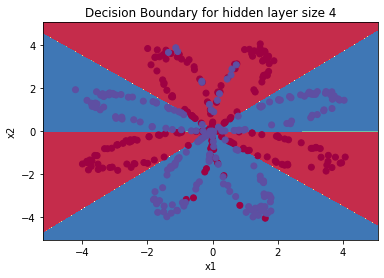

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import plot_decision_boundary, sigmoid, load_extra_datasets, load_planar_dataset
%matplotlib inline

np.random.seed(1) 
X, Y = load_planar_dataset()

# 构建神经网络的一般方法是： 
# 1. 定义神经网络结构（输入单元的数量，隐藏单元的数量等）。 
# 2. 初始化模型的参数 
# 3. 循环：
        # 实施前向传播
        # 计算损失
        # 实现向后传播
        # 更新参数（梯度下降）

#定义神经网络的结构
    # n_x: 输入层的数量
    # n_h: 隐藏层的数量（这里设置为4）
    # n_y: 输出层的数量
def layer_size(X,Y):
    """
    参数：
     X - 输入数据集,维度为（输入的数量，训练/测试的数量）
     Y - 标签，维度为（输出的数量，训练/测试数量）

    返回：
     n_x - 输入层的数量
     n_h - 隐藏层的数量
     n_y - 输出层的数量
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

#初始化参数
def initialize_parameters(n_x, n_h, n_y):
    """
    参数：
        n_x - 输入节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量

    返回：
        parameters - 包含参数的字典：
            W1 - 权重矩阵,维度为（n_h，n_x）
            b1 - 偏向量，维度为（n_h，1）
            W2 - 权重矩阵，维度为（n_y，n_h）
            b2 - 偏向量，维度为（n_y，1）

    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2
                 }
    return parameters

#前向传播
def forward_propagation(X, parameters):
    """
    参数：
         X - 维度为（n_x，m）的输入数据。
         parameters - 初始化函数（initialize_parameters）的输出

    返回：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2
            }
    return (A2, cache)


#计算损失
def compute_cost(A2, Y):
    """
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
         parameters - 一个包含W1，B1，W2和B2的字典类型的变量

    返回：成本 
    """
    m = Y.shape[1]
    cost = (-1 / m) * (np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log(1-A2).T))
    cost = float(np.squeeze(cost))
    return cost



#后向传播
    
def backward_propagation(parameters, cache, X, Y):
    """
    使用上述说明搭建反向传播函数。

    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    m = Y.shape[1]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2 }

    return grads


#更新参数（梯度下降）
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    使用上面给出的梯度下降更新规则更新参数

    参数：
     parameters - 包含参数的字典类型的变量。
     grads - 包含导数值的字典类型的变量。
     learning_rate - 学习速率

    返回：
     parameters - 包含更新参数的字典类型的变量。
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2
                 }
    return parameters

#整合
def nn_model(X, Y, n_h, num_iters, learning_rate = 1.2, print_cost = False):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
     """
    np.random.seed(3)
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(num_iters):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost:
            if i % 1000 == 0:
                print("第{}次循环，cost是{}".format(i,cost))
    return parameters

#预测
def predict(parameters, X):
    """
    使用学习的参数，为X中的每个示例预测一个类

    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）

    返回
        predictions - 我们模型预测的向量（红色：0 /蓝色：1）

    """
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

#运行
parameters = nn_model(X, Y, n_h = 4, num_iters = 10000, learning_rate = 0.5, print_cost = True)
#注意这里的最后一个参数一定要是np.squeeze(Y)，否则会报错。？？？？
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
plt.title("Decision Boundary for hidden layer size " + str(4))
predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

